# Import de données numériques

Code sous licence creative commun CC BY-NC-SA BY Gaëlle Rebolini et Jean-Matthieu Barbier

Le programme présenté ci-dessous est adapté à des fichiers .csv (type tableur) obtenus lors de pointages vidéo. Il devra évidemment être adapté pour des fichiers obtenus lors d'autres expériences.

1.	Enregistrer ou exporter le fichier contenant votre tableau de données sous format .csv (ou .txt pour Avistep) dans le dossier contenant votre notebook (fichier .ipynb) ou votre programme python (fichier.py). Attention, pour l'utilisation avec l'ENT Nero version 2018, petite subtilité à la fin.

    -	Dans Regressi, enregistrer le fichier sous le format (type) OpenOffice, CSV (choisir « Vrai CSV » dans la fenêtre qui s’affiche alors).
    -	Dans Loggerpro, exporter le fichier comme CSV…
    -	Dans Aviméca, exporter les données dans Regressi puis vous reporter à la ligne ci-dessus.
    -	Dans Avistep, exporter/enregistrer le fichier sous le format .txt
    -	Dans Excel, enregistrer votre fichier sour le format CSV (séparateur:point-virgule). 
    -	Dans OpenCalc, enregistrer votre fichier sour le format CSV (texte CSV ; séparateur:point-virgule, **jeu de caractères : Unicode utf-8**)
    
    
Attention : les logiciels de pointage retournent des tableaux de colonnes avec des entêtes (une à deux lignes) qu'il faudra par la suite retranscrire sous forme de listes (une liste par colonne) sans tenir compte des entêtes.

Voici une capture d'écran du fichier parabole.csv obtenu à l'aide de Regavi/Regressi ouvert sous Excel

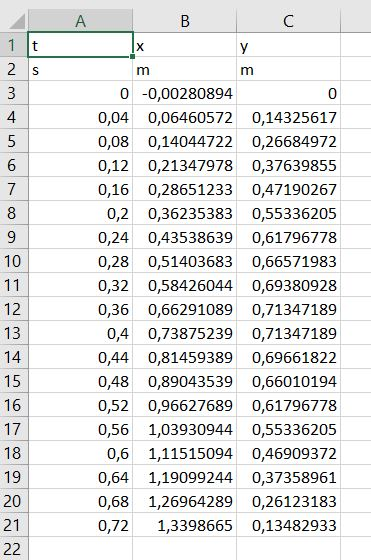

Le même fichier ouvert sous Jupiter Notebook

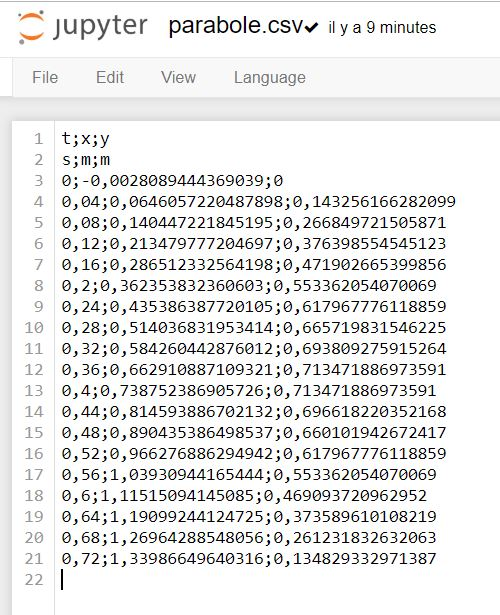

2. Les cellules suivantes contiennent les lignes de code qui vous permettront d'afficher votre tableau de données sous forme de listes (une liste par colonne de votre tableau)

In [1]:
# Chargement de la bibliothèque csv afin de pouvoir lire par la suite 
# le fichier csv

import csv

In [2]:
# création de la fonction appelée charge_fichier_csv() qui 
# permettra de récupérer les données des colonnes d'un fichier.csv 
# (ou fichier.txt pour le logiciel Avistep)
# Il faut préciser le délimiteur de colonnes utilisé dans le 
# fichier .csv (ici c'est par défaut ";", pour les fichiers .txt d'Avistep 
# c'est "\t")
# Il faut préciser le nombre de lignes d'en-tête N du fichier en tenant 
# compte des lignes vides, par défaut N=0.

def charge_fichier_csv(fichier, delimiter =";",N=0):

# ouverture du fichier .csv (ou fichier.txt pour avistep)

    with open(fichier, 'r', encoding='utf-8') as f :
        
# lecture du fichier à l'aide de la fonction csv.reader. 

        rfichier = csv.reader(f, delimiter=delimiter)
    
# création et initialisation du tableau sous forme de liste qui recevra 
# les listes de nombres réels correspondant aux colonnes
    
        tableau=[]
    
# le contenu d'une cellule est initialement lu comme une chaîne de 
# caractères 
# nous voulons obtenir des listes de nombres réels correspondant 
# aux colonnes de notre tableau csv, 
# donc :
#        - il ne faut pas prendre en compte les lignes 
#          correspondant aux entêtes et les lignes vides
#        - il faut convertir les chaines de caractères en nombres 
#          réels décimaux

# attention : les virgules des nombres décimaux doivent être 
# remplacées par des points

# test permettant de sauter les lignes d'en-tête
        index_row=0                     # indice de la ligne = 0
        for row in rfichier:            # pour chaque ligne du fichier csv
            if index_row < N:
                index_row = index_row+1
                
# on parcourt chaque cellule d'une ligne du tableau csv 

            else : 
                for i in range (len(row)): 
                           
# Lors du parcours de la première ligne, on crée pour chaque cellule 
# une liste vide qui contiendra par la suite les valeurs d'une colonne 
# du fichier csv.
# Puis on l'ajoute au tableau
                    if len(tableau) <= i:
                        X = []
                        tableau.append(X) 
    
# Pour chaque ligne, on ajoute à chaque liste créée précédemment
# les valeurs des cellules parcourues en les convertissant en 
# nombre réel décimal et en évitant les erreurs liées 
# souvent à des cellules vides (cas de Avistep)
                    try:
                        tableau[i].append(float(row[i].replace(",",'.')))    
                    except ValueError:
                        print('erreur:contenu de cellule non numérique')
                        continue
            
        return (tableau)

Voici la fonction sans commentaire afin d'y voir un peu plus clair !

In [3]:
def charge_fichier_csv(fichier, delimiter=";",N=0):
    """
    Charge un fichier csv et le renvoie sous forme de tableau
    
    :param: nom de fichier, délimiteur de cellules (par défaut ";"), 
    nombre de lignes d'en-tête (en comptant les lignes vides)
    :returns: tableau des données
    """
 
    with open(fichier, 'r', encoding='utf-8') as f :
        rfichier = csv.reader(f, delimiter=delimiter)
        tableau=[]
        index_row=0
        for row in rfichier:            
            if index_row < N:
                index_row = index_row+1
            else : 
                for i in range (len(row)): 
                    if len(tableau) <= i:
                        X = []       
                        tableau.append(X) 
                    try:
                        tableau[i].append(float(row[i].replace(",",'.')))    
                    except ValueError:
                        print('erreur:contenu de cellule non numérique')
                        continue
            
        return (tableau)

In [4]:
# Le début du chemin n'a pas besoin d'être spécifié si le fichier 
# .csv se trouve dans le même dossier que ce fichier notebook

tableau = charge_fichier_csv('09-fichiers-csv-parabole.csv',delimiter=";",N=2)
t=tableau[0]
print(t)
x=tableau[1]
print(x)
y=tableau[2]
print(y)

[0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4, 0.44, 0.48, 0.52, 0.56, 0.6, 0.64, 0.68, 0.72]
[-0.002808944, 0.064605722, 0.140447222, 0.213479777, 0.286512333, 0.362353832, 0.435386388, 0.514036832, 0.584260443, 0.662910887, 0.738752387, 0.814593887, 0.890435386, 0.966276886, 1.039309442, 1.115150941, 1.190992441, 1.269642885, 1.339866496]
[0.0, 0.143256166, 0.266849722, 0.376398555, 0.471902665, 0.553362054, 0.617967776, 0.665719832, 0.693809276, 0.713471887, 0.713471887, 0.69661822, 0.660101943, 0.617967776, 0.553362054, 0.469093721, 0.37358961, 0.261231833, 0.134829333]


**WARNING : subtilité pour le jupyter ENT Nero 2018**

Même si vous avez mis vos fichiers CSV dans le même répertoire que votre fichier ipynb dans votre espace "Mes documents" de l'ENT, l'importation des données csv ne fonctionnera pas (en passant, l'affichage des images de ce notebook non plus, d'ailleurs..)

En fait sur cette version 2018, lors de l'exécution d'un notebook ipython, l'ENT copie ce fichier dans un répertoire temporaire vide... donc raté pour les fichers CSV.


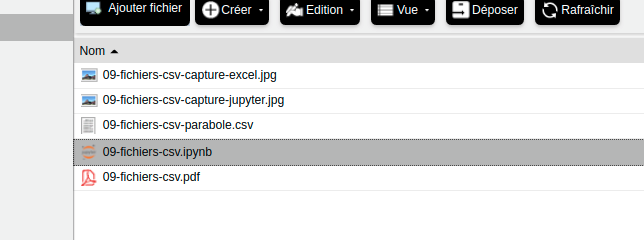

Il existe une solution qui ressemble un peu à un bricolage, mais qui fonctionne en attendant 2019 :

- dans le notebook jupyter, cliquer sur "Fichier > Ouvrir"
- le répertoire de travail de votre notebook apparaît alors dans un onglet séparé
- vous pouvez alors y placer votre fichier csv avec le bouton "Upload"



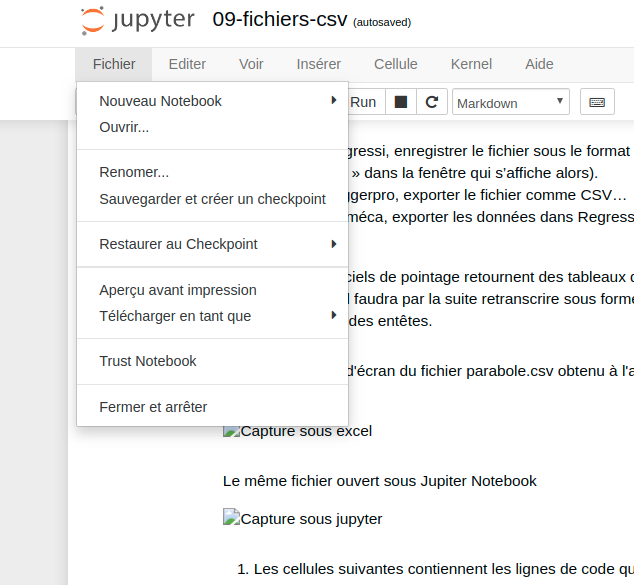


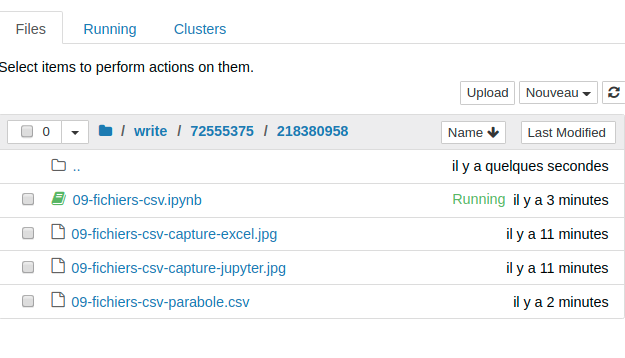

A partir de la rentrée 2019, un autre mécanisme est possible pour charger des fichiers présents dans l’ENT, en utilisant une bibliothèque spécifique : NEROFS. Toutefois la méthode précédente fonctionne encore bien et est un peu plus simple.